<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Modeling Walkthrough

_Authors: Riley Dallas (AUS)_

---

### Learning Objectives
*After this lesson, you will be able to:*

- Gather, clean, explore and model a dataset from scratch.
- Split data into testing and training sets using both train/test split and cross-validation and apply both techniques to score a model.
- Evaluate several models.


## Importing libaries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `matplotlib.pyplot`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. `LinearRegression`, `LassoCV` and `RidgeCV` from `sklearn`'s `linear_model` module
6. `StandardScaler` from `sklearn`'s `preprocessing` module
7. `r2_score` from `sklearn`'s `metrics` module 

In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the Data

---

Today's [dataset](http://www-bcf.usc.edu/~gareth/ISL/data.html) (`College.csv`) is from the [ISLR website](http://www-bcf.usc.edu/~gareth/ISL/). 

Rename `Unnamed: 0` to `University`.

In [2]:
path = './datasets/'
df = pd.read_csv(path+'College.csv')
df.rename(columns={'Unnamed: 0':'University'}, inplace=True)
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data cleaning: Initial check
---

Check the following in the cells below:
1. Do we have any null values?
2. Are any numerical columns being read in as `object`?

In [3]:
# Check for nulls
df.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
University     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null object
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(15), object(3)
memory usage: 115.4+ KB


In [4]:
# Check column data types
df.dtypes
# phd should be numbers not string

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD             object
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

## Data cleaning: Clean up `PhD` column
---

`PhD` is being read in as a string because some of the cells contain non-numerical values. In the cell below, replace any non-numerical values with `NaN`'s, and change the column datatype to float.

In [5]:
# replace any non-numerical values with NaN's, and change the column datatype to float.
df['PhD'] = pd.to_numeric(df['PhD'], errors='coerce')

In [6]:
# # or...
# df.PhD = df.PhD.map(lambda phd: np.nan if phd=='?' else float(phd))

In [7]:
# chk datatype of PhD col
df.info()
# looks correct now, is float! and strings have been replaced with NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
University     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            748 non-null float64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 115.4+ KB


In [8]:
df['PhD']

0      70.0
1      29.0
2      53.0
3      92.0
4      76.0
5       NaN
6      90.0
7      89.0
8      79.0
9      40.0
10     82.0
11     73.0
12     60.0
13     79.0
14     36.0
15     78.0
16      NaN
17     48.0
18     62.0
19     60.0
20     69.0
21     83.0
22     55.0
23     88.0
24     79.0
25     57.0
26     93.0
27     85.0
28     65.0
29     78.0
       ... 
747    75.0
748    66.0
749    62.0
750    68.0
751    77.0
752    81.0
753    92.0
754    66.0
755    80.0
756    84.0
757    80.0
758    88.0
759    78.0
760    91.0
761    74.0
762    39.0
763    94.0
764    67.0
765    69.0
766    53.0
767    71.0
768    48.0
769    82.0
770    91.0
771    92.0
772    60.0
773    73.0
774    67.0
775    96.0
776    75.0
Name: PhD, Length: 777, dtype: float64

## Data cleaning: Drop `NaN`'s
---

Since there are a small percentage of null cells, let's go ahead and drop them.

In [9]:
# drop null rows
df.dropna(inplace=True)

In [10]:
# chk no. of remaining rows
df.info()
# looks correct! from 777 rows all became 748 rows as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 776
Data columns (total 19 columns):
University     748 non-null object
Private        748 non-null object
Apps           748 non-null int64
Accept         748 non-null int64
Enroll         748 non-null int64
Top10perc      748 non-null int64
Top25perc      748 non-null int64
F.Undergrad    748 non-null int64
P.Undergrad    748 non-null int64
Outstate       748 non-null int64
Room.Board     748 non-null int64
Books          748 non-null int64
Personal       748 non-null int64
PhD            748 non-null float64
Terminal       748 non-null int64
S.F.Ratio      748 non-null float64
perc.alumni    748 non-null int64
Expend         748 non-null int64
Grad.Rate      748 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 116.9+ KB


## Feature engineering: Binarize `'Private'` column
---

In the cells below, convert the `Private` column into numerical values.

In [11]:
df['Private'].value_counts()
# many yes and no. gotta convert them into 1/0

Yes    544
No     204
Name: Private, dtype: int64

In [12]:
# create mapping to convert Yes to 1, No to 0
mapping = {'Yes': 1, 'No': 0}
df = df.replace({'Private': mapping})

# chk dtypes
df.info()
# successfully converted Private to 1/0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 776
Data columns (total 19 columns):
University     748 non-null object
Private        748 non-null int64
Apps           748 non-null int64
Accept         748 non-null int64
Enroll         748 non-null int64
Top10perc      748 non-null int64
Top25perc      748 non-null int64
F.Undergrad    748 non-null int64
P.Undergrad    748 non-null int64
Outstate       748 non-null int64
Room.Board     748 non-null int64
Books          748 non-null int64
Personal       748 non-null int64
PhD            748 non-null float64
Terminal       748 non-null int64
S.F.Ratio      748 non-null float64
perc.alumni    748 non-null int64
Expend         748 non-null int64
Grad.Rate      748 non-null int64
dtypes: float64(2), int64(16), object(1)
memory usage: 116.9+ KB


In [13]:
df.head(20)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15
6,Albertus Magnus College,1,353,340,103,17,45,416,230,13290,5720,500,1500,90.0,93,11.5,26,8861,63
7,Albion College,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89.0,100,13.7,37,11487,73
8,Albright College,1,1038,839,227,30,63,973,306,15595,4400,300,500,79.0,84,11.3,23,11644,80
9,Alderson-Broaddus College,1,582,498,172,21,44,799,78,10468,3380,660,1800,40.0,41,11.5,15,8991,52
10,Alfred University,1,1732,1425,472,37,75,1830,110,16548,5406,500,600,82.0,88,11.3,31,10932,73


## Feature engineering: Create an `Elite` column
---

The `Top10perc` is the percentage of students enrolled that graduated high school in the top 10th percentile. Let's create a column called `Elite` that has the following values:
- 1 if `Top10perc` is greater than or equal to 50%
- 0 if `Top10perc` is less than 50%

In [14]:
# set as 1 if >50%, else 0
df["Elite"] = (df["Top10perc"]>50).astype(int)
df.head(100)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60,0
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56,0
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54,0
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59,1
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15,0
6,Albertus Magnus College,1,353,340,103,17,45,416,230,13290,5720,500,1500,90.0,93,11.5,26,8861,63,0
7,Albion College,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89.0,100,13.7,37,11487,73,0
8,Albright College,1,1038,839,227,30,63,973,306,15595,4400,300,500,79.0,84,11.3,23,11644,80,0
9,Alderson-Broaddus College,1,582,498,172,21,44,799,78,10468,3380,660,1800,40.0,41,11.5,15,8991,52,0
10,Alfred University,1,1732,1425,472,37,75,1830,110,16548,5406,500,600,82.0,88,11.3,31,10932,73,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 776
Data columns (total 20 columns):
University     748 non-null object
Private        748 non-null int64
Apps           748 non-null int64
Accept         748 non-null int64
Enroll         748 non-null int64
Top10perc      748 non-null int64
Top25perc      748 non-null int64
F.Undergrad    748 non-null int64
P.Undergrad    748 non-null int64
Outstate       748 non-null int64
Room.Board     748 non-null int64
Books          748 non-null int64
Personal       748 non-null int64
PhD            748 non-null float64
Terminal       748 non-null int64
S.F.Ratio      748 non-null float64
perc.alumni    748 non-null int64
Expend         748 non-null int64
Grad.Rate      748 non-null int64
Elite          748 non-null int32
dtypes: float64(2), int32(1), int64(16), object(1)
memory usage: 119.8+ KB


## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

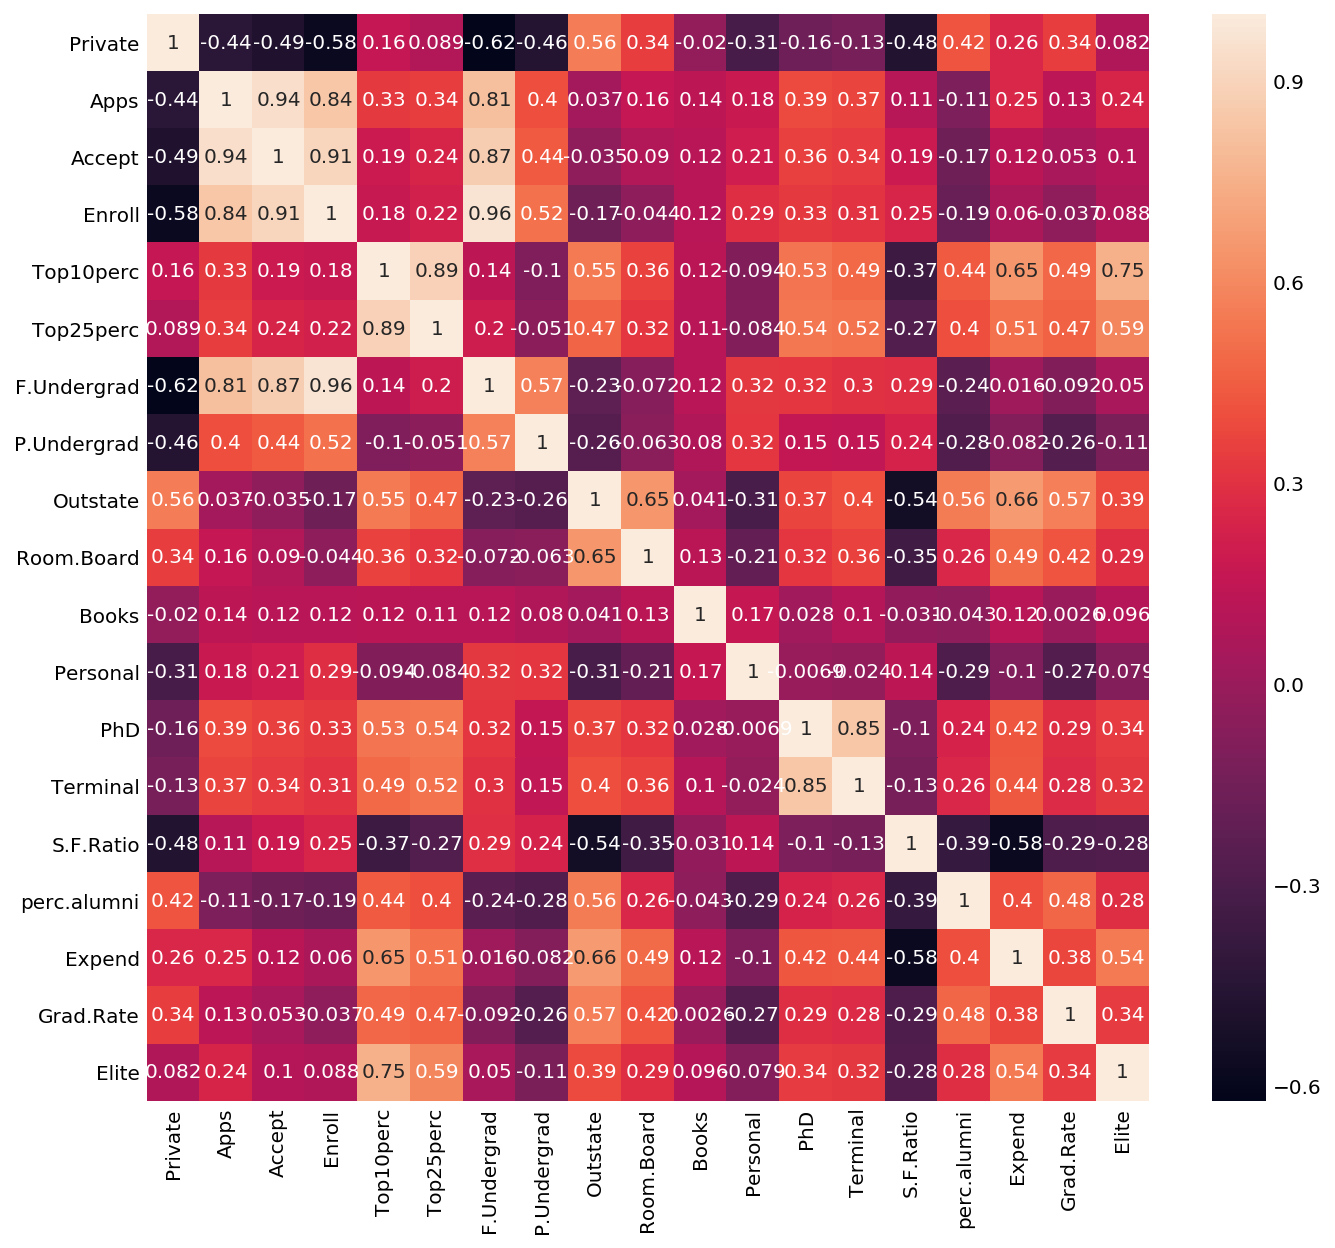

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);
# variables Accept (0.94), Enroll (.084), F.Undergrad (0.81), P.Undergrad (0.4) have high corr with target Apps

## EDA: Use seaborn's `.pairplot()` method to create scatterplots 
---

Let's create a pairplot to see how some of our stronger predictors correlate to our target (`Apps`). Instead of creating a pairplot of the entire DataFrame, we can use the `y_vars` and `x_vars` params to get a smaller subset.

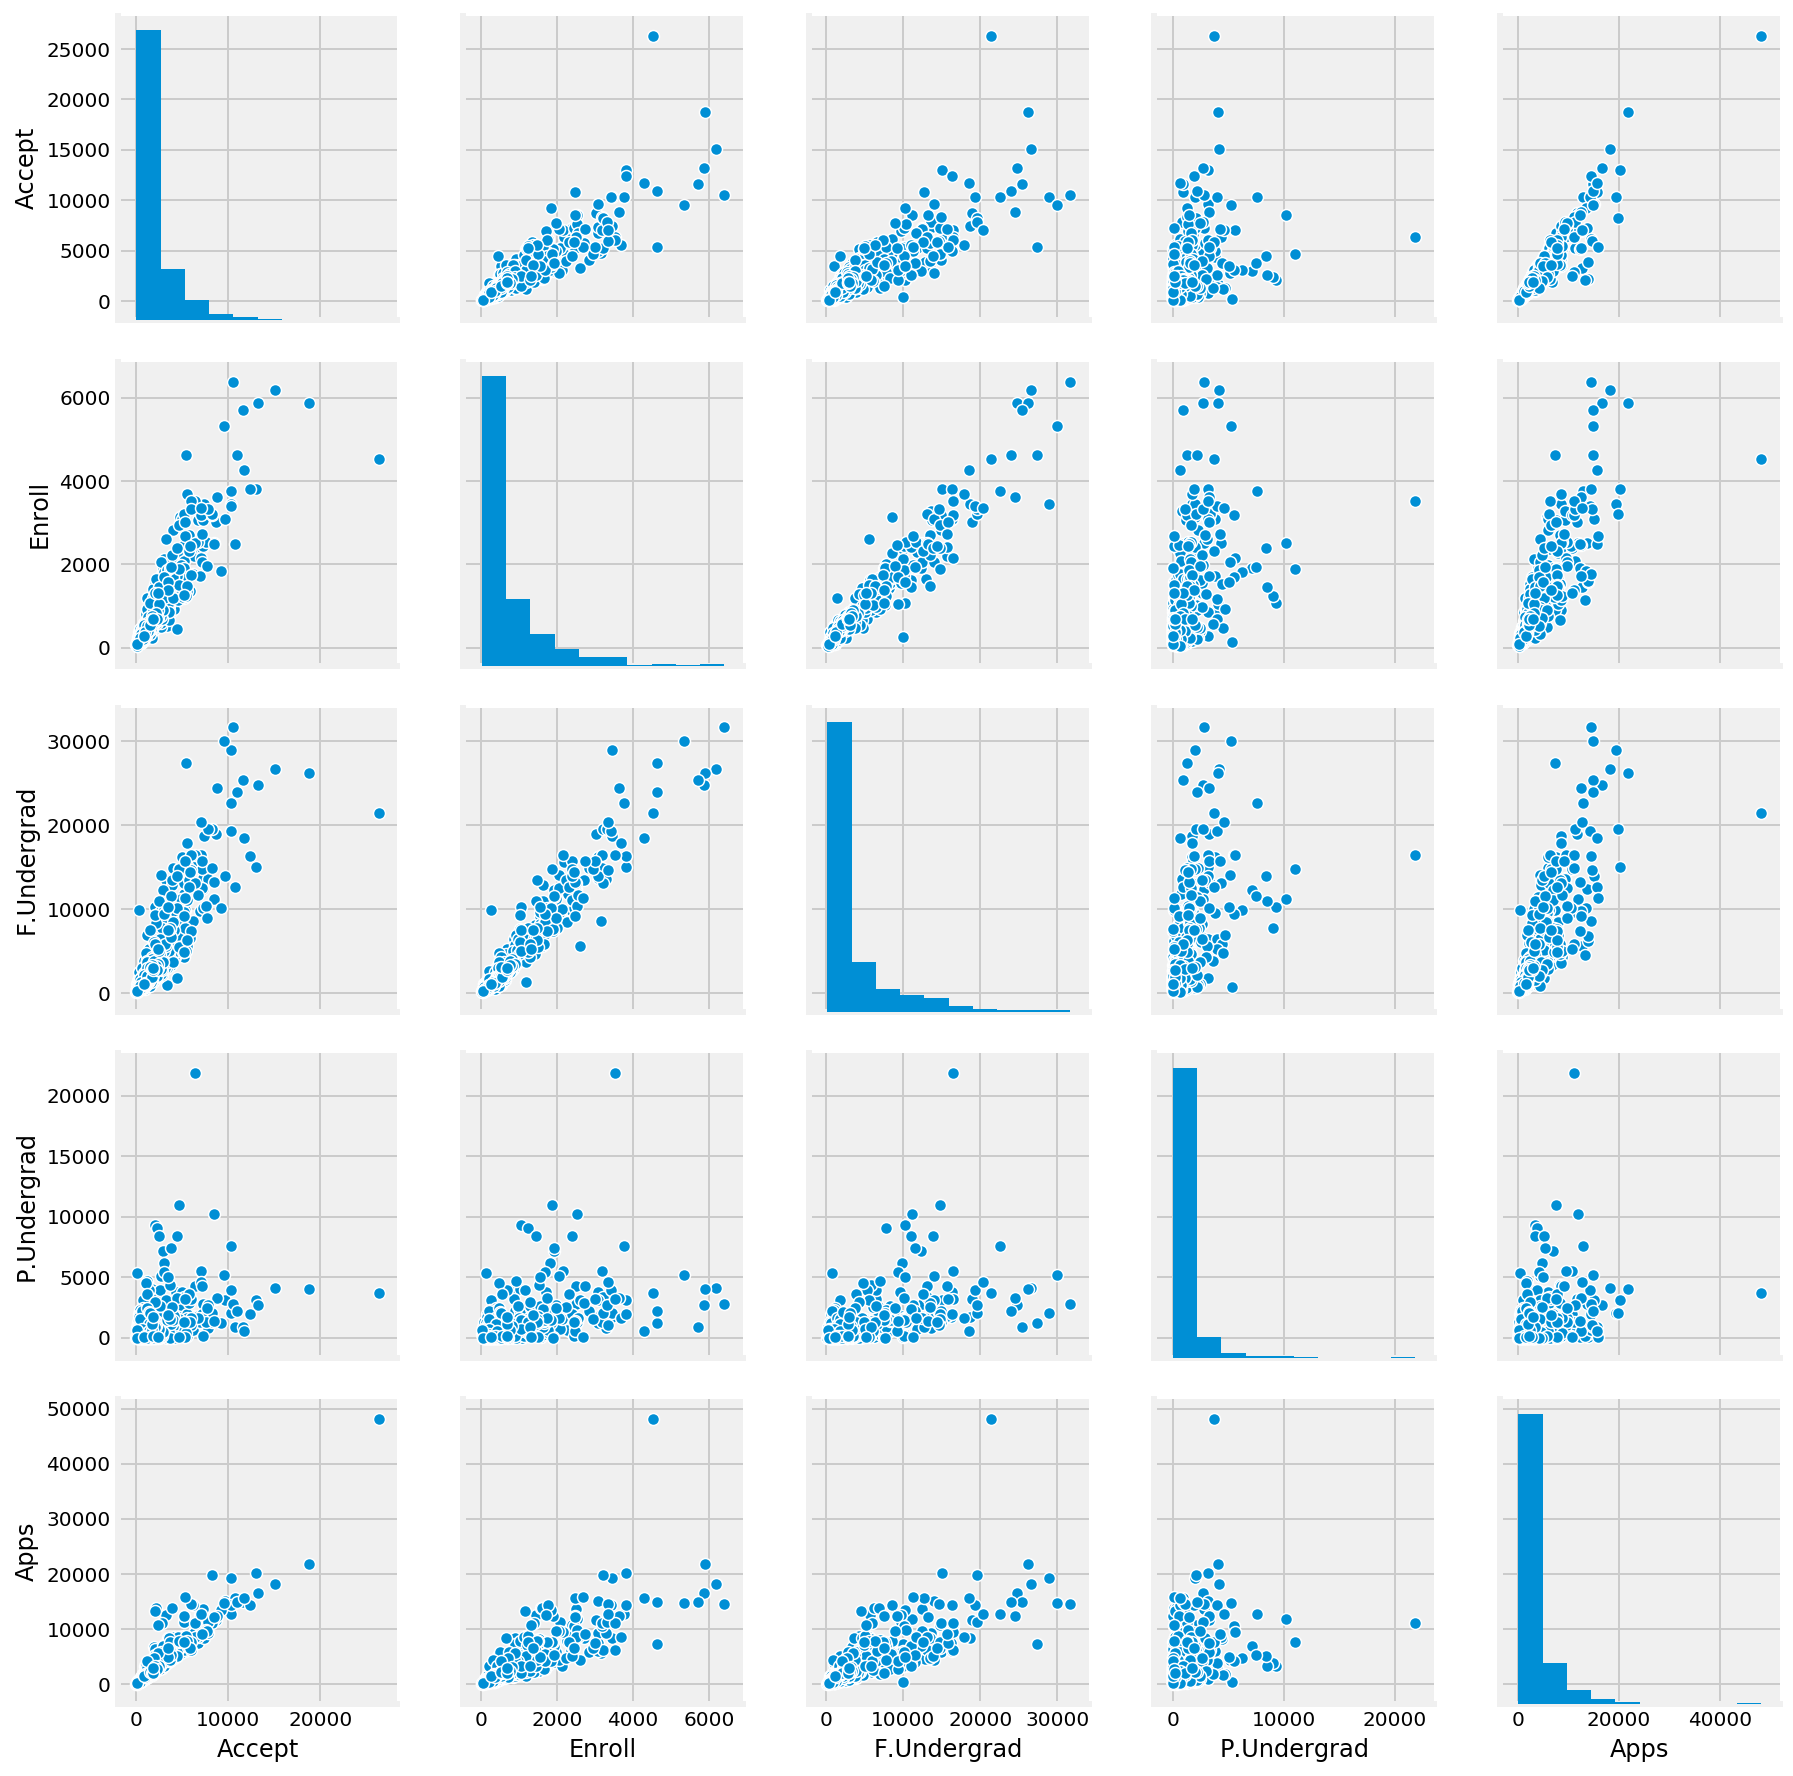

In [17]:
x_vars = df[['Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad']]
y_vars = df['Apps']

# combine subset of dataframes into 1
df_subset = pd.concat([x_vars,y_vars], axis=1)
sns.pairplot(df_subset)

## EDA: Create histograms of all numerical columns
---

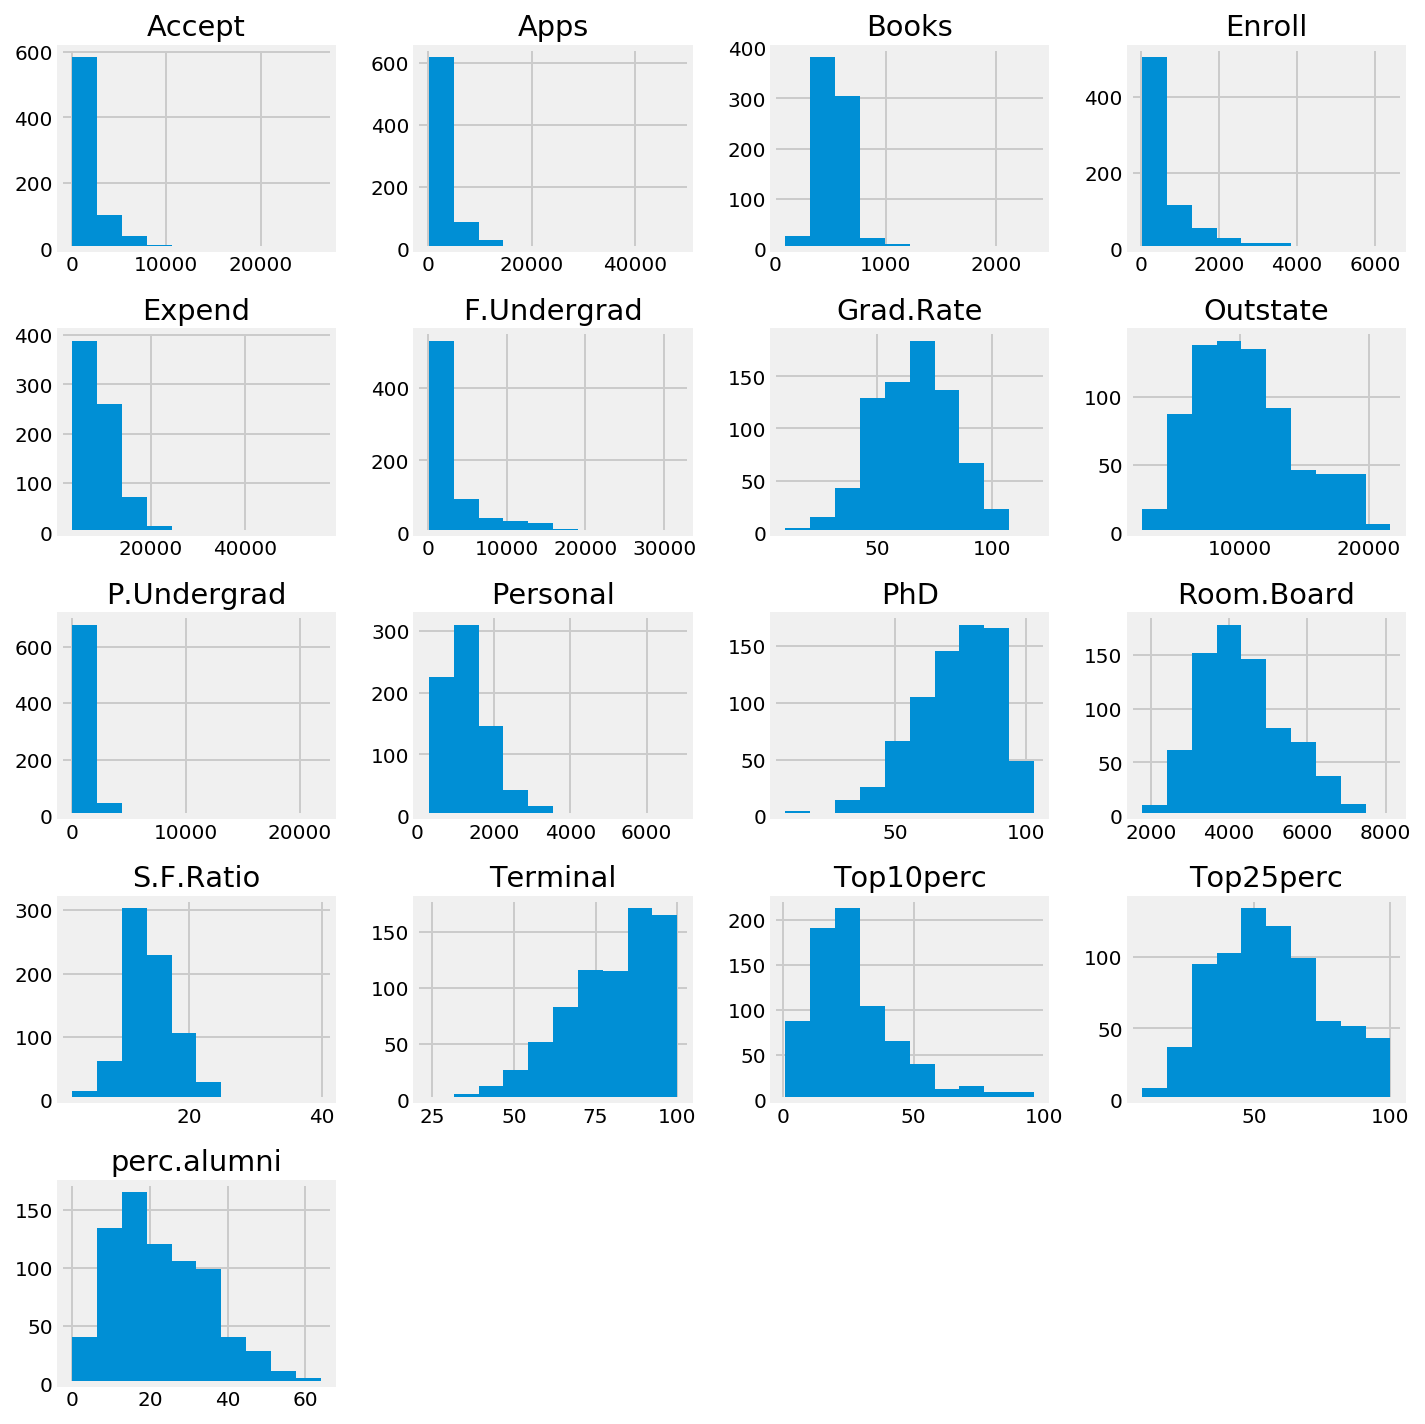

In [29]:
# select and plot only numerical cols
features = [k for k in df.columns if (k!='Private') & (k!='Elite') & (k!='University')]
df[features].hist(figsize=(10,10));

# space out plots
plt.tight_layout()

## EDA: Boxplots
---

In the cells below, create two boxplots:
1. One for our taget (`Apps`)
2. And one for our strongest predictor (`Accept`)

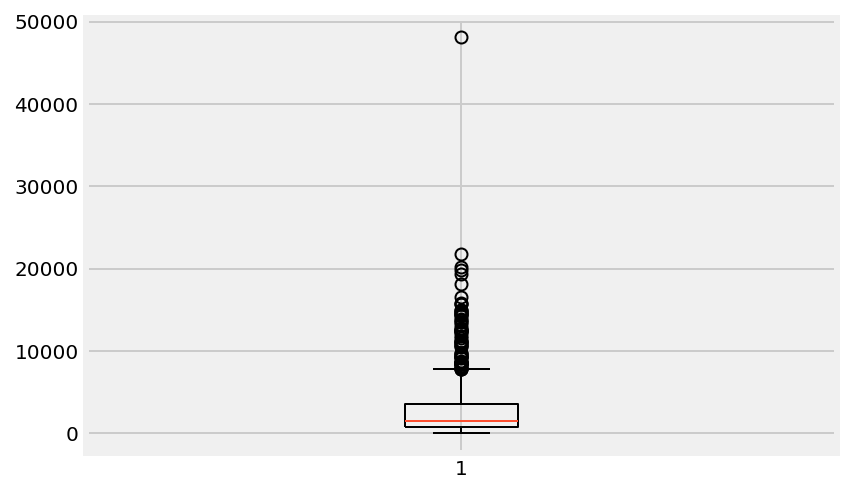

In [72]:
plt.boxplot(df['Apps']);

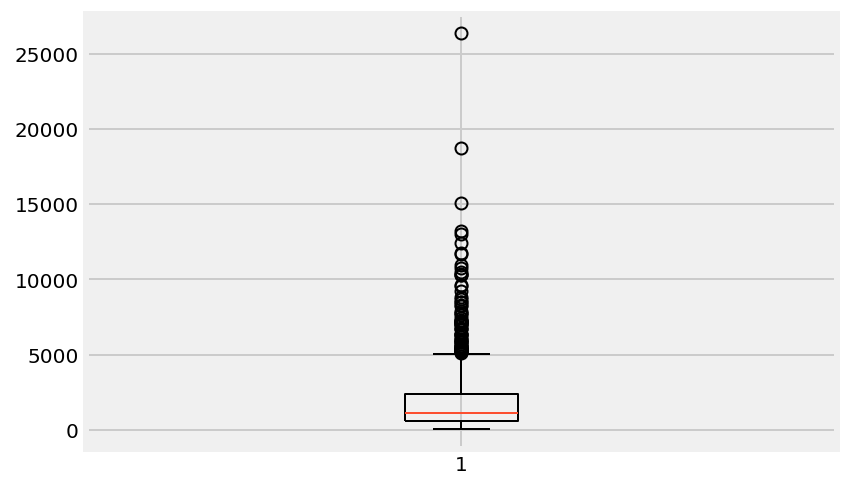

In [70]:
plt.boxplot(df['Accept']);

## Model Prep: Create our features matrix (`X`) and target vector (`y`)
---

Every **numerical** column (that is not our target) will be used as a feature.

The `Apps` column is our label: the number of applications received by that university.

In the cell below, create your `X` and `y` variables.

In [93]:
features = [k for k in df.columns if (k!='Apps') & (k!='Unnamed: 0')]
X = df[features]
y = df['Apps']
# features

## Model Prep: Train/test split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Model Prep: Scaling
---

Since we're using `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fit a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_train)

## Model Prep: Instantiate our models
---

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [113]:
lr = LinearRegression()
lasso_cv = LassoCV()
ridge_cv = RidgeCV()

## Cross validation
---

Use `cross_val_score` to evaluate all three models.

In [119]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.9144609388187263

In [120]:
cross_val_score(lasso_cv, X_train, y_train, cv=5).mean()

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value

0.9128026519418098

In [121]:
cross_val_score(ridge_cv, X_train, y_train, cv=5).mean()

0.9136349662883025

## Model Fitting and Evaluation
---

`RidgeCV` seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.